In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk

import nltk

In [ ]:
!pip install svgling
import svgling

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
reviews = pd.read_csv('/content/Reviews.csv')

In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews.shape

(187322, 10)

<Axes: title={'center': 'Review by stars'}, xlabel='Score'>

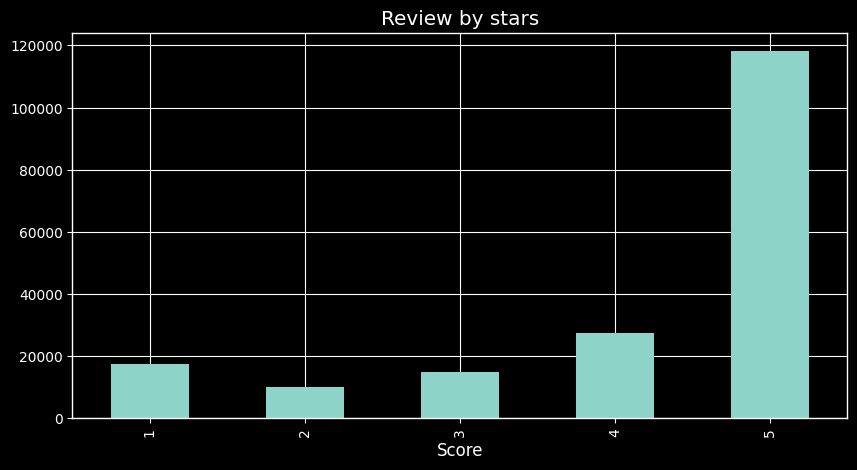

In [ ]:
# quick EDA
reviews['Score'].value_counts().sort_index().plot(kind = 'bar',
                                                  title = 'Review by stars',
                                                  figsize= (10,5))


In [ ]:
example = reviews['Text'][100]
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [ ]:
nltk.word_tokenize(example)

['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the',
 'ways',
 '...',
 "''",
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'like',
 'apple',
 'products',
 'a',
 'must',
 'have',
 'item',
 '.',
 'The',
 'only',
 'draw',
 'back',
 ',',
 'shipping',
 'cost',
 '.',
 'These',
 'are',
 'very',
 'heavy',
 '.']

In [ ]:
tags = nltk.pos_tag(nltk.word_tokenize(example))
tags

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('ways', 'NNS'),
 ('...', ':'),
 ("''", "''"),
 ('<', 'VBZ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 (',', ','),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('.', '.'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ'),
 ('.', '.')]

In [ ]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


In [ ]:
# VADER = Valence Aware Dictionary sEntiment Reasoner
# doesn't account for relationship between words

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
# sample usecase
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('i am so frustrated')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5709}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [ ]:
# running the polarity score through the entire dataset

result = {}

for i, row in tqdm(reviews.iterrows(), total = len(reviews)):
  text = row['Text']
  text_id = row['Id']
  result[text_id] = sia.polarity_scores(text)


  0%|          | 0/187322 [00:00<?, ?it/s]

In [ ]:
result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(reviews, how = 'left')

In [ ]:
vaders.head() # contains sentiment score and the metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


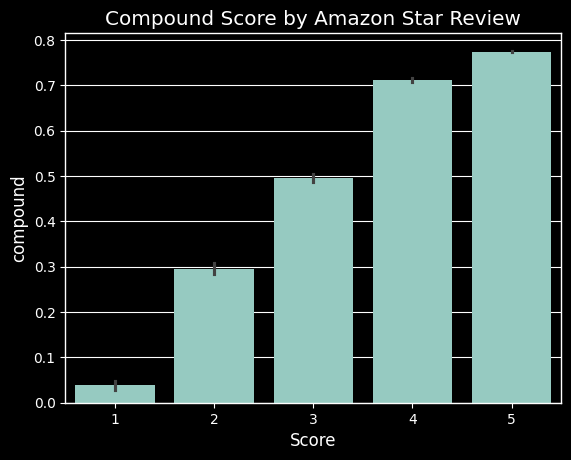

In [ ]:
chart = sns.barplot(data=vaders, x='Score', y='compound')
chart.set_title('Compound Score by Amazon Star Review')
plt.show()

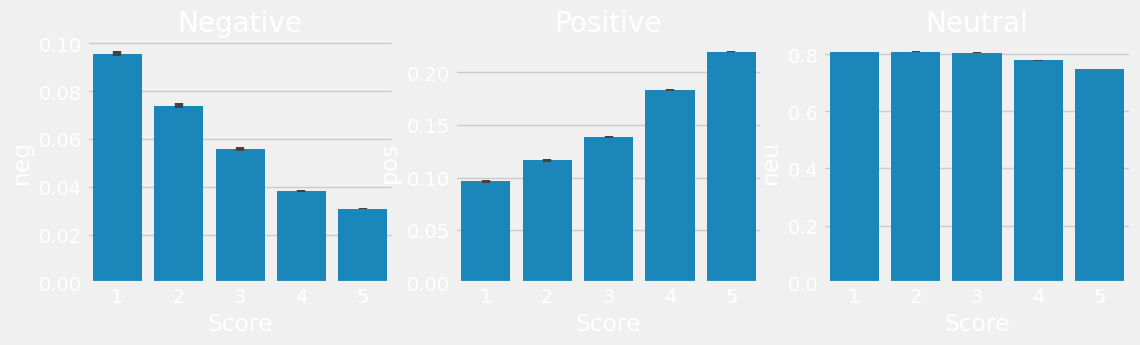

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='neg', ax=axes[0])
sns.barplot(data=vaders, x='Score', y='pos', ax=axes[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=axes[2])
axes[0].set_title('Negative')
axes[1].set_title('Positive')
axes[2].set_title('Neutral')
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]